DATA USED IN THIS PROJECT DONT BELONG TO ME.
READ BELOW!

==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

=========================================
Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Dataset Characteristics
=========================================

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Data

In [2]:
hour = pd.read_csv('hour.csv')

In [3]:
day = pd.read_csv('day.csv')

----------------

### Lets get to know our Data

Beginning this project we are going to focus on the hour data. This dataset contains total bike rentals per hour. Let's see the first 5 rowns.

In [48]:
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Next step is to output some basic info. We can see that there are 17379 (per hour)instances and thankfully we have no missing data.

In [43]:
print(hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Using describe method we can notice some useful data about the minimum or maximum bike data rentals. We can see that at some point there was only 1 bike rental while the mean rental is supposed to be at 189 bikes per hour. That makes me wonder what was happening at that time. Maybe some really bad weather conditions or something. We are going to further dig into the data later on.

In [50]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


---------

### Some numbers about our data.

Find out the maximul rental number per hour and when did that occured.

In [233]:
print('The max rental per hour was:', hour['cnt'].max(), 'and it happened:')
print ('-' * 50)
#hour[hour['cnt']==hour['cnt'].max()]
print(hour.loc[hour['cnt'].idxmax()])

The max rental per hour was: 977 and it happened:
--------------------------------------------------
instant            14774
dteday        2012-09-12
season                 3
yr                     1
mnth                   9
hr                    18
holiday                0
weekday                3
workingday             1
weathersit             1
temp                0.66
atemp             0.6212
hum                 0.44
windspeed         0.2537
casual                91
registered           886
cnt                  977
Name: 14773, dtype: object


Counting the total bike rentals during that period we see that there were 3,292,679 rentals. That is impressive.

In [57]:
print('Total count of bike rentals are :', hour['cnt'].sum())

Total count of bike rentals are : 3292679


Let's see the registered user percentage renting.

In [91]:
print('Total count of registered user rentals were :', hour['registered'].sum())
print('Bikes rented by registered users were:',round(hour['registered'].sum()/hour['cnt'].sum()*100,2),'%')

Total count of registered user rentals were : 2672662
Bikes rented by registered users were: 81.17 %


Same way about non registered users percentage.

In [92]:
print('Total count of non registered user rentals were :', hour['casual'].sum())
print('Bikes rented by non registered users were:',round(hour['casual'].sum()/hour['cnt'].sum()*100,2),'%')

Total count of non registered user rentals were : 620017
Bikes rented by non registered users were: 18.83 %


Let's see the mean value of bike rental per hour. We see that during that period there were about 189 bike rentals per hour.

In [54]:
print('Mean value of bike rentals per hour is:', hour['cnt'].mean())

Mean value of bike rentals per hour is: 189.46308763450142


Great. Knowing the bike rentals per hour we can count bike rentals per minute.So, every minute at least 3 people were renting a bicycle to roam!! Huge number!

In [56]:
print('Bike rentals per minute: ', hour['cnt'].mean()/60)

Bike rentals per minute:  3.1577181272416905


------------

### Some more Digging

Let's get an idea about the weather during the instances. Most of the time that data were recorded, weather was clear with few clouds. Only at 3 instances weather was really bad.

In [154]:
weather_dict = {1: 'Clear - Few Clouds', 2: 'Mist - Cloudy', 3: 'Light Rain - Snow', 4: 'Heavy Rain - Thunderstorm'}
hour.groupby(['weathersit']).size().rename(index=weather_dict).rename_axis("Weather Conditions")

Weather Conditions
Clear - Few Clouds           11413
Mist - Cloudy                 4544
Light Rain - Snow             1419
Heavy Rain - Thunderstorm        3
dtype: int64

Bike rental per hour and percentage of the the total number. Five in the afternoon is the cler winner here.

In [180]:
c = hour[["hr", "cnt"]].groupby(['hr']).sum().sort_values(by='cnt',ascending=False)
c['Percentage']= round(c['cnt']/c['cnt'].sum(),2)
print(c)

       cnt  Percentage
hr                    
17  336860        0.10
18  309772        0.09
8   261001        0.08
16  227748        0.07
19  226789        0.07
13  184919        0.06
12  184414        0.06
15  183149        0.06
14  175652        0.05
20  164550        0.05
9   159438        0.05
7   154171        0.05
11  151320        0.05
10  126257        0.04
21  125445        0.04
22   95612        0.03
23   63941        0.02
6    55132        0.02
0    39130        0.01
1    24164        0.01
2    16352        0.00
5    14261        0.00
3     8174        0.00
4     4428        0.00


Every afternoon during 17:00-18:00 there were average 461 bike rentals!! The least bike rentals where are 4 in the morning.

In [186]:
d = round(hour[["hr", "cnt"]].groupby(['hr']).mean().sort_values(by='cnt',ascending=False),2)
print(d)

       cnt
hr        
17  461.45
18  425.51
8   359.01
16  311.98
19  311.52
13  253.66
12  253.32
15  251.23
14  240.95
20  226.03
9   219.31
7   212.06
11  208.14
10  173.67
21  172.31
22  131.34
23   87.83
6    76.04
0    53.90
1    33.38
2    22.87
5    19.89
3    11.73
4     6.35


Let's group by Season. Autumn is the most favorable season for the bikers.

In [249]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
hour[["season", "cnt"]].groupby(['season']).sum().rename(index=season_dict).rename_axis("Season")

,cnt
Season,
Spring,471348
Summer,918589
Autumn,1061129
Winter,841613


Grouping by Year. 

In [268]:
year_dict = {0: '2011', 1: '2012'}
hour[["yr", "cnt"]].groupby(['yr']).sum().rename(index=year_dict).rename_axis("Year")

,cnt
Year,
2011,1243103
2012,2049576


In [278]:
print('Biking rental was up by',round((100 * (2049576 - 1243103) / 1243103),2),'% from 2011 to 2012')

Biking rental was up by 64.88 % from 2011 to 2012


In [263]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
hour[["mnth", "cnt"]].groupby(['mnth']).sum().rename(index=month_dict).rename_axis("Month")

,cnt
Month,
January,134933
February,151352
March,228920
April,269094
May,331686
June,346342
July,344948
August,351194
September,345991


-----------

#### Exploratory

Using a distplot we see that most of bike rental instances per hour are between 0 and 200.

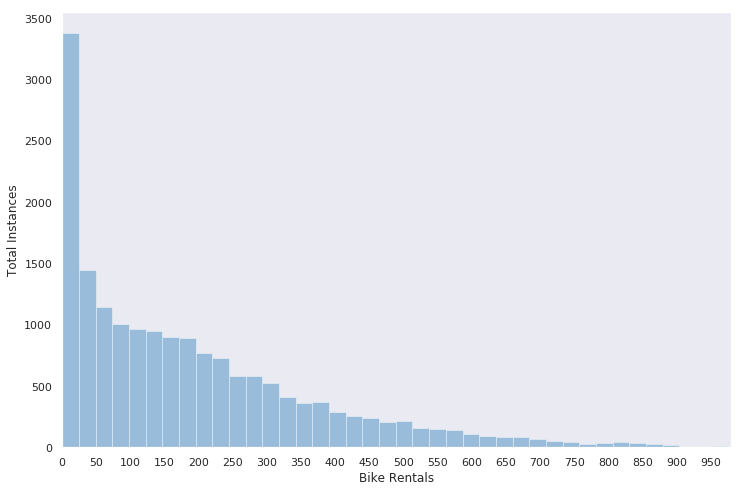

In [209]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
plt.figure(figsize=(12,8))
#paper, notebook, talk, poster
sns.set_context('notebook')
plt.xlim(0, 980)
plt.xticks(np.arange(0, 980, 50))
ax = sns.distplot(hour['cnt'], kde=False, bins=40)
ax.set_xlabel("Bike Rentals")
ax.set_ylabel("Total Instances")
plt.show()

We see clearly here that Summer and Fall are the most preferred seasons for bike rentals.

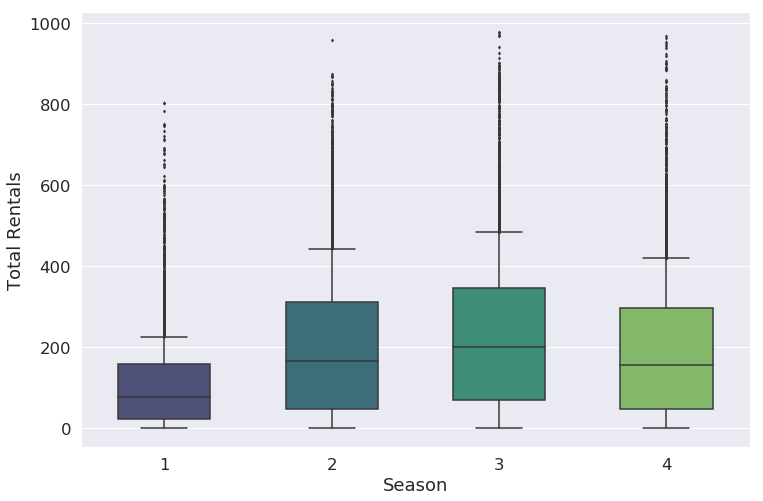

In [207]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="season", y="cnt", data=hour, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Season")
ax.set_ylabel("Total Rentals")
plt.show()

Most of the bikes are rented at 8 in the morning and 5-6 on the evening. Probably because of the working hours. Some people seem to prefer bike for going & leaving their jobs xD.

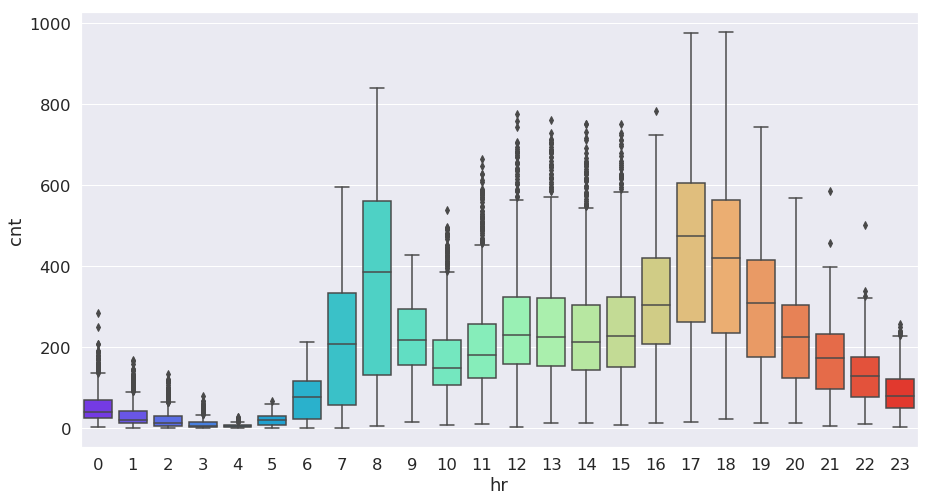

In [208]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(15,8))
sns.boxplot(x="hr", y="cnt", data=hour,palette='rainbow')
plt.show()

In [235]:
s=hour.max()

In [240]:
print '%s, %s, %s' % (s['Country'], s['Place'], s['Value'])

SyntaxError: invalid syntax (<ipython-input-240-a173607b6f01>, line 1)

#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
plt.figure(figsize=(12,8))
#paper, notebook, talk, poster
sns.set_context('notebook')
g = sns.FacetGrid(data=hour,col='season')
g.map(plt.hist,'cnt')

In [94]:
#season_dict = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
#hour.groupby(['season']).size().rename(index=season_dict).rename_axis("Season")